# Naive Bayes

In [0]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

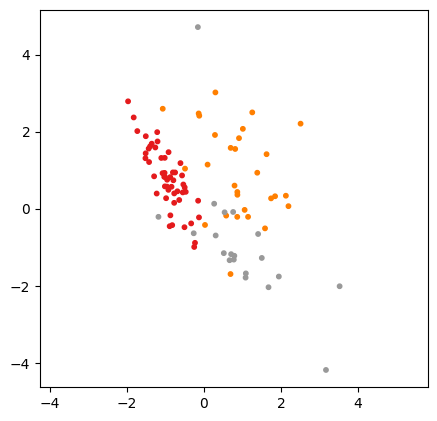

In [3]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1,
                           weights=[.5, .3], random_state=2)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='Set1')
x_min, x_max, y_min, y_max = plt.axis('equal')
plt.show()

In [4]:
pC = np.asarray([np.sum(y==l) for l in range(len(set(y)))], dtype=np.float)
pC *= 1/np.sum(pC)
print("p(C_i)", pC)

p(C_i) [0.51 0.29 0.2 ]


In [5]:
mu = np.asarray([np.mean(X[y==l, :], axis=0) for l in range(len(set(y)))])
sigma = np.asarray([np.std(X[y==l, :], axis=0) for l in range(len(set(y)))])
print("mu:", mu)

mu: [[-0.94357081  0.78957813]
 [ 0.87977406  0.96018417]
 [ 0.95745011 -0.92388642]]


In [0]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                      np.arange(y_min, y_max, .1))
coords = np.c_[xx.ravel(), yy.ravel()]

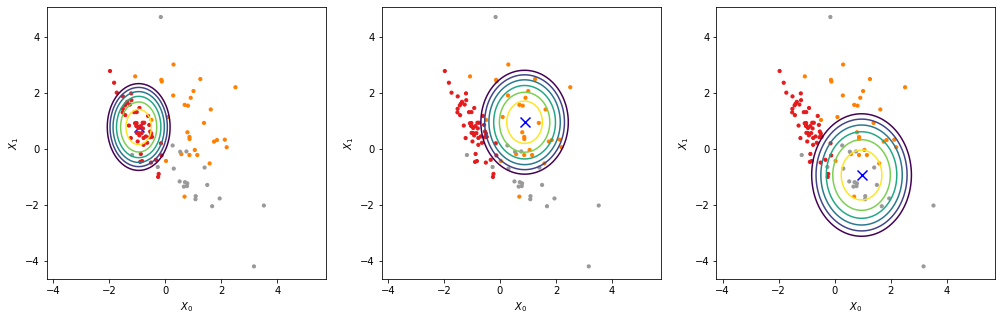

In [7]:
fig = plt.figure(figsize=(17, 5))
for i in range(len(set(y))):
  C = np.zeros((2, 2))
  C[0, 0] = sigma[i, 0]
  C[1, 1] = sigma[i, 1]
  P = lambda x: np.matmul(np.matmul(np.vstack(mu[i, :]-x).T, np.linalg.inv(C)), np.vstack(mu[i, :]-x))
  Z = np.apply_along_axis(P, 1, coords)
  Z = Z.reshape(xx.shape)
  ax = fig.add_subplot(1, 3, i+1)
  ax.contour(xx, yy, -Z, cmap='viridis', levels=[-3, -2.5, -2, -1.5, -1, -.5])
  ax.scatter(mu[i, 0], mu[i, 1], s=100, marker='x', linewidths=3, c='b')
  ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='Set1')
  ax.axis('equal')
  ax.set_xlabel("$X_0$")
  ax.set_ylabel("$X_1$")
fig.show()

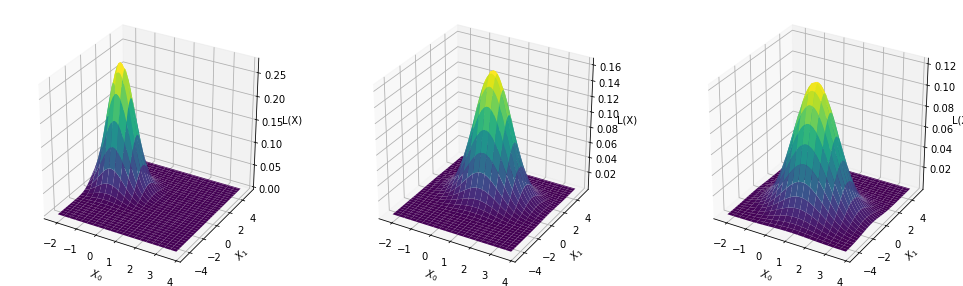

In [8]:
fig = plt.figure(figsize=(17, 5))
for i in range(len(set(y))):
  P = lambda x: multivariate_normal(mu[i, :], sigma[i, :]).pdf(x)
  Z = np.apply_along_axis(P, 1, coords)
  Z = Z.reshape(xx.shape)
  ax = fig.add_subplot(1, 3, i+1, projection='3d')
  ax.plot_surface(xx, yy, Z, rstride=3, cstride=3, cmap='viridis')
  ax.set_xlabel("$X_0$")
  ax.set_ylabel("$X_1$")
  ax.set_zlabel("L(X)")
fig.show()

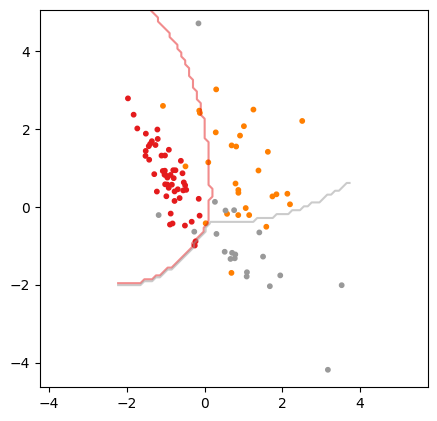

In [9]:
clf = lambda x: np.argmax([multivariate_normal(mu[i, :], sigma[i, :]).pdf(x)*pC[i] for i in range(len(pC))])
Z = np.apply_along_axis(clf, 1, coords)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='Set1')
plt.contour(xx, yy, Z, cmap='Set1', alpha=.5, levels=[.5, 1.5])
plt.axis('equal')
plt.show()

In [10]:
mu_ = np.asarray([np.mean(X[y==l, :], axis=0) for l in range(len(set(y)))])
C = np.asarray([np.cov(X[y==l, :].T) for l in range(len(set(y)))])
C

array([[[ 0.17908843, -0.27719703],
        [-0.27719703,  0.65364334]],

       [[ 0.68242337, -0.28029162],
        [-0.28029162,  1.36119656]],

       [[ 1.1747555 , -1.10822736],
        [-1.10822736,  2.67160229]]])

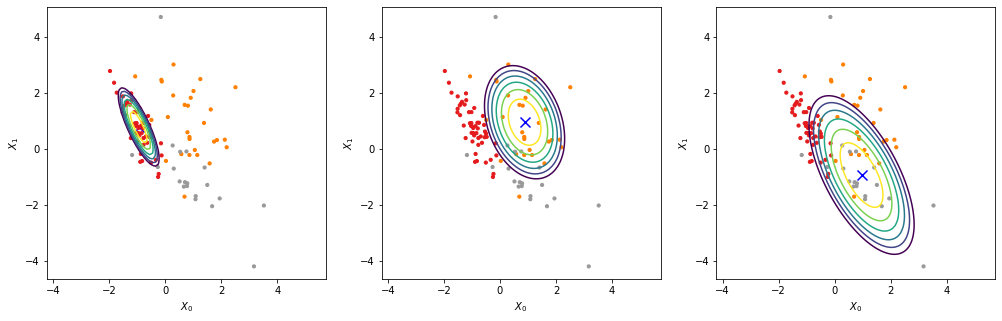

In [11]:
fig = plt.figure(figsize=(17, 5))
for i in range(len(set(y))):
  P = lambda x: np.matmul(np.matmul(np.vstack(mu[i, :]-x).T, np.linalg.inv(C[i])), np.vstack(mu[i, :]-x))
  Z = np.apply_along_axis(P, 1, coords)
  Z = Z.reshape(xx.shape)
  ax = fig.add_subplot(1, 3, i+1)
  ax.contour(xx, yy, -Z, cmap='viridis', levels=[-3, -2.5, -2, -1.5, -1, -.5])
  ax.scatter(mu[i, 0], mu[i, 1], s=100, marker='x', linewidths=3, c='b')
  ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='Set1')
  ax.axis('equal')
  ax.set_xlabel("$X_0$")
  ax.set_ylabel("$X_1$")
fig.show()

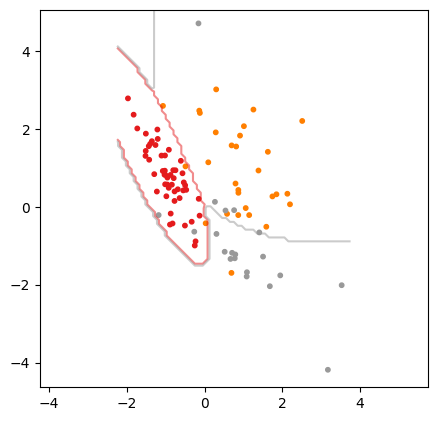

In [12]:
clf = lambda x: np.argmax([multivariate_normal(mu[i, :], C[i]).pdf(x)*pC[i] for i in range(len(pC))])
Z = np.apply_along_axis(clf, 1, coords)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='Set1')
plt.contour(xx, yy, Z, cmap='Set1', alpha=.5, levels=[.5, 1.5])
plt.axis('equal')
plt.show()